# **Wine_Classification**

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Overview **Dataset**

In [2]:
#load wine dataset
wine = load_wine()
type(dir(wine))

list

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
#description of wine dataset
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [15]:
print(wine.data)
print("각 데이터는 {0}개의 숫자로 이루어져있습니다".format(len(wine.data[0])))

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
각 데이터는 13개의 숫자로 이루어져있습니다


In [16]:
wine_data=wine.data
wine_label=wine.target
wine_target_names=wine.target_names

print("Dataset의 shape는 {0}이다".format(wine_data.shape))
print("Dataset target의 shape는 {0}이다".format(wine_label.shape))
print("Dataset의 target 구성은 {0}이다".format(wine_target_names))

Dataset의 shape는 (178, 13)이다
Dataset target의 shape는 (178,)이다
Dataset의 target 구성은 ['class_0' 'class_1' 'class_2']이다


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(wine_data)

In [93]:
import pandas as pd

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## **Preprocessing Dataset**

**Split Train&Test set**

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_train_scale,
                                                    wine_label,
                                                    test_size=0.3,
                                                    random_state=15)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  124 , X_test 개수:  54
y_train 개수:  124 , y_test 개수:  54


## **Training With Various Models**

### **Decision_Tree**

In [95]:
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      0.89      0.89        19
           2       0.88      0.88      0.88        17

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



In [96]:
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_test,y_pred,binary=False)

cm

array([[18,  0,  0],
       [ 0, 17,  2],
       [ 0,  2, 15]])

Text(0.5, 1.0, 'Wine_Classification_CM')

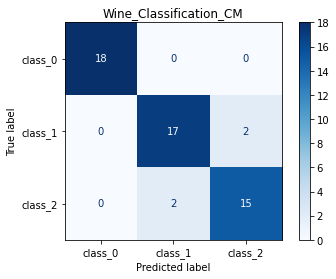

In [97]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as plt

title="Wine_Classification_CM"
disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                             display_labels=wine_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)


### **RandomForest**

In [98]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [99]:
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_test,y_pred,binary=False)

cm

array([[18,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 17]])

Text(0.5, 1.0, 'Wine_Classification_CM')

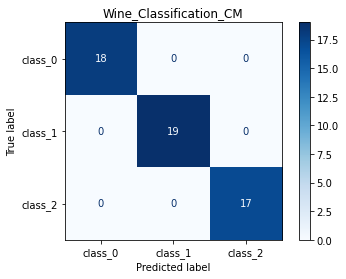

In [100]:
disp = plot_confusion_matrix(random_forest, X_test, y_test,
                             display_labels=wine_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Wine_Classification_CM")

### **SVM**

In [102]:
from sklearn import svm
import numpy as np

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.90      1.00      0.95        19
           2       1.00      0.94      0.97        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Text(0.5, 1.0, 'WINE_CLASSIFIER_CM')

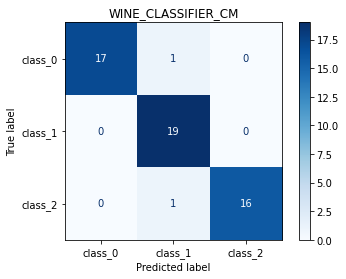

In [103]:
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                             display_labels=wine_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("WINE_CLASSIFIER_CM")

### **SGD**

In [104]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss='modified_huber',max_iter=500)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Text(0.5, 1.0, 'WINE_CLASSIFIER_CM')

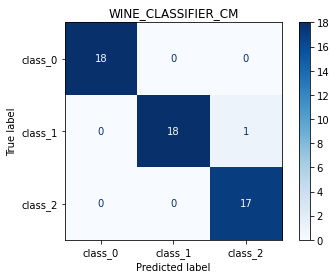

In [105]:
disp = plot_confusion_matrix(sgd_model, X_test, y_test,
                             display_labels=wine_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("WINE_CLASSIFIER_CM")

### **LogisticClassifier**

In [106]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(random_state=0, max_iter=10000,solver='saga').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Text(0.5, 1.0, 'WINE_CLASSIFIER_CM')

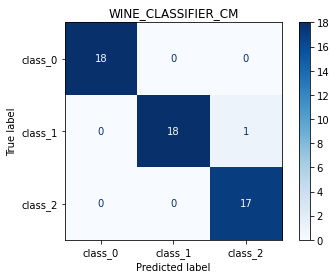

In [107]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=wine_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("WINE_CLASSIFIER_CM")

## **COMMENTS**

*   f-1 score가 중요 포인트며, 모든 모델에서 다 정확도가 높게 나온다.
